<a href="https://colab.research.google.com/github/aaa0034213/2024-1-my-BDA/blob/main/inclass/07w_0416_tue_B_ch08_seaborn_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 설치 확인

In [ ]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [ ]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)
print(msno.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
2.0.3
1.25.2
0.13.1
0.5.2


# 코랩에서 한글 처리

In [ ]:
!pip install koreanize_matplotlib

In [ ]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

# 그림 해상도와 크기: 해상도를 높이면 크기에 비례에 커짐
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.dpi' : '100'})             # 해상도, 기본값 72
plt.rcParams.update({'figure.figsize' : [4, 2.5]})      # 그림 크기, 기본값 [6, 4]

# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

# 산점도 만들기

In [ ]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 5.81 MiB/s, done.


In [ ]:
import pandas as pd
mpg = pd.read_csv('data/mpg.csv')

In [ ]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [ ]:
mpg.describe(include="all")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
count,234,234,234.00,234.00,234.00,234,234,234.00,234.00,234,234
unique,15,38,NaN,NaN,NaN,10,3,NaN,NaN,5,7
top,dodge,caravan 2wd,NaN,NaN,NaN,auto(l4),f,NaN,NaN,r,suv
freq,37,11,NaN,NaN,NaN,83,106,NaN,NaN,168,62
mean,NaN,NaN,3.47,2003.50,5.89,NaN,NaN,16.86,23.44,NaN,NaN
std,NaN,NaN,1.29,4.51,1.61,NaN,NaN,4.26,5.95,NaN,NaN
min,NaN,NaN,1.60,1999.00,4.00,NaN,NaN,9.00,12.00,NaN,NaN
25%,NaN,NaN,2.40,1999.00,4.00,NaN,NaN,14.00,18.00,NaN,NaN
50%,NaN,NaN,3.30,2003.50,6.00,NaN,NaN,17.00,24.00,NaN,NaN
75%,NaN,NaN,4.60,2008.00,8.00,NaN,NaN,19.00,27.00,NaN,NaN


In [ ]:
mpg.count()

manufacturer    234
model           234
displ           234
year            234
cyl             234
trans           234
drv             234
cty             234
hwy             234
fl              234
category        234
dtype: int64

In [ ]:
mpg.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
category        0
dtype: int64

In [ ]:
mpg.isna().sum().sum()

0

In [ ]:
# mpg.shape 시험
mpg.shape

(234, 11)

In [ ]:
mpg.shape[0]

234

In [ ]:
mpg.shape[1]

11

In [ ]:
mpg.fl.value_counts()

fl
r    168
p     52
e      8
d      5
c      1
Name: count, dtype: int64

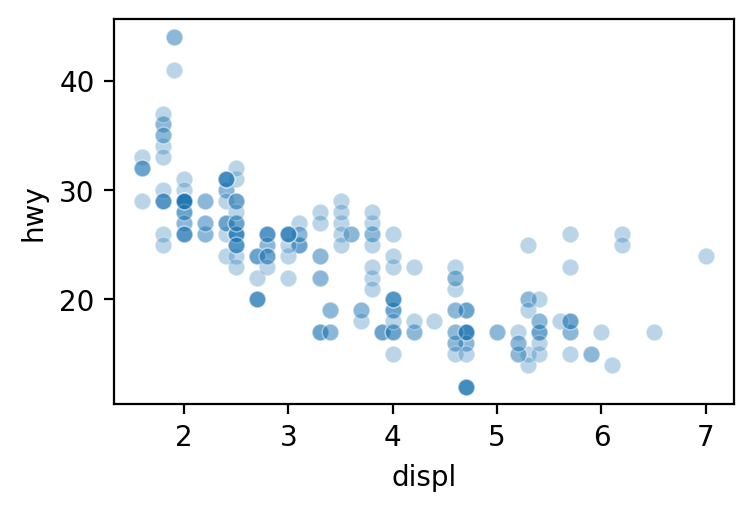

In [ ]:
import seaborn as sns
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', alpha=.3);

In [ ]:
import seaborn as sns
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy');

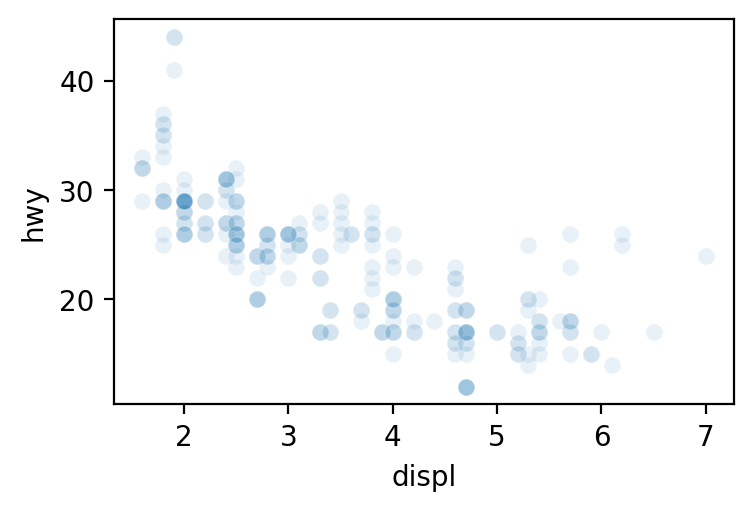

In [ ]:
import seaborn as sns
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', alpha=.1);

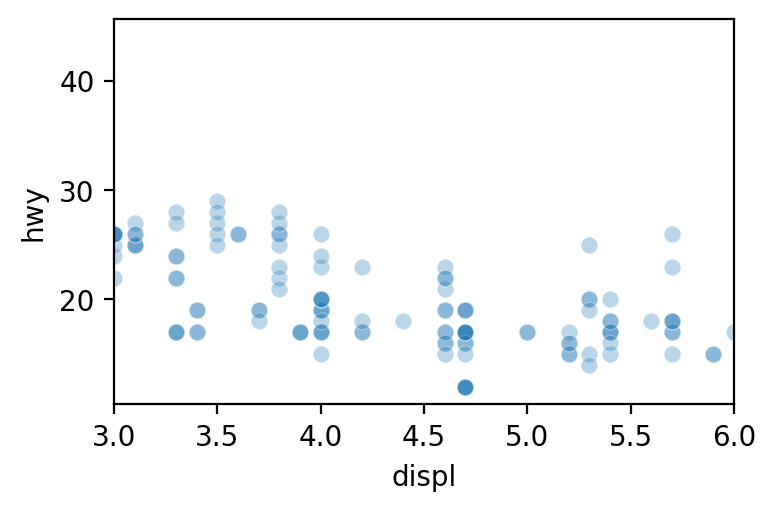

In [ ]:
# x축 범위 3~6으로 제한
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', alpha=.3).set(xlim = [3, 6]);

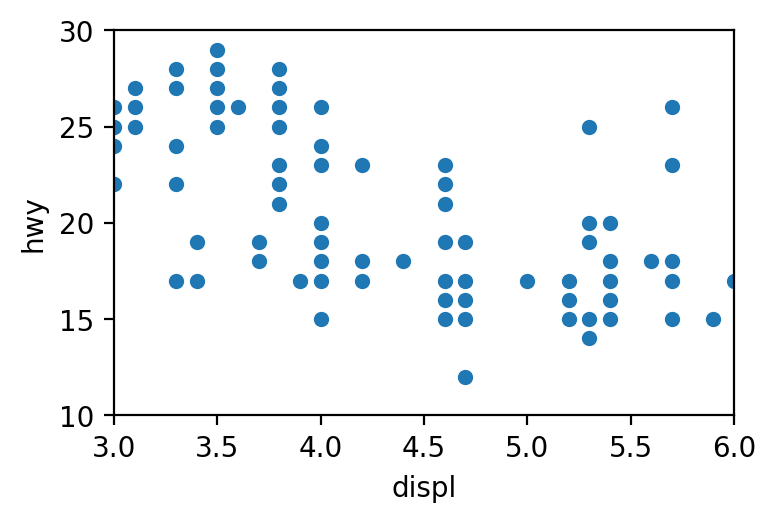

In [ ]:
# x축 범위 3~6, y축 범위 10~30으로 제한
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy').set(xlim = [3, 6], ylim = [10, 30]);

<Axes: xlabel='displ', ylabel='hwy'>

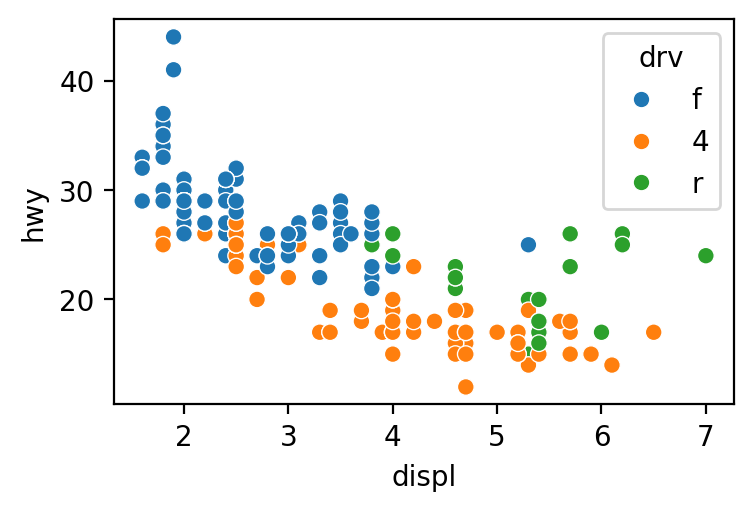

In [ ]:
# 종류별로 표식 색 바꾸기
# drv 별로 표식 색 다르게 표현

sns.scatterplot(mpg, x='displ', y='hwy', hue='drv')

In [ ]:
sns.scatterplot(mpg, x='displ', y='hwy', hue='displ')

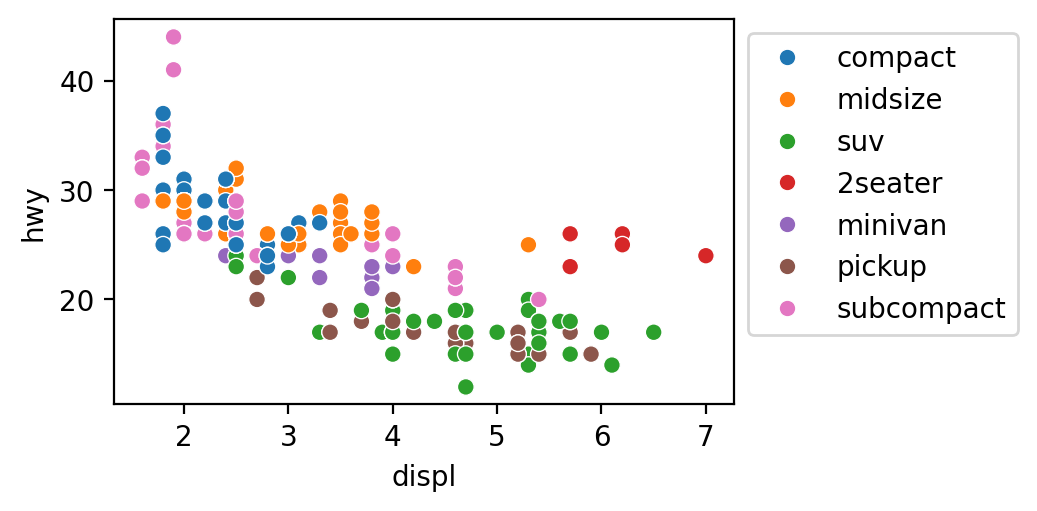

In [ ]:
sns.scatterplot(mpg, x='displ', y='hwy', hue='category')
plt.legend(loc=2, bbox_to_anchor=(1, 1));

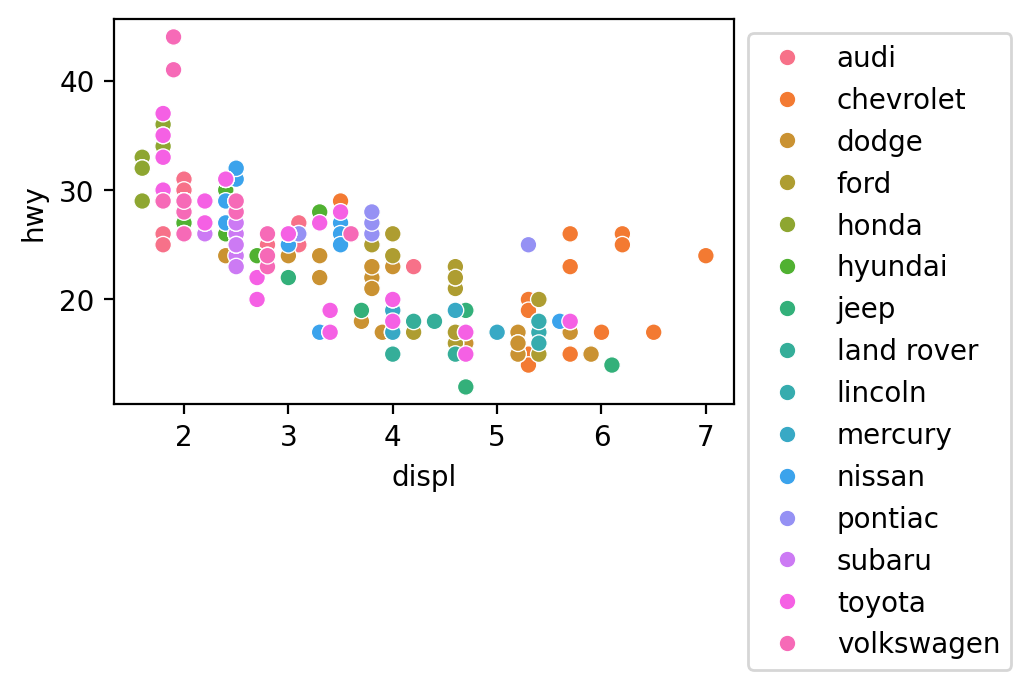

In [ ]:
sns.scatterplot(mpg, x='displ', y='hwy', hue='manufacturer')
plt.legend(bbox_to_anchor=(1, 1));

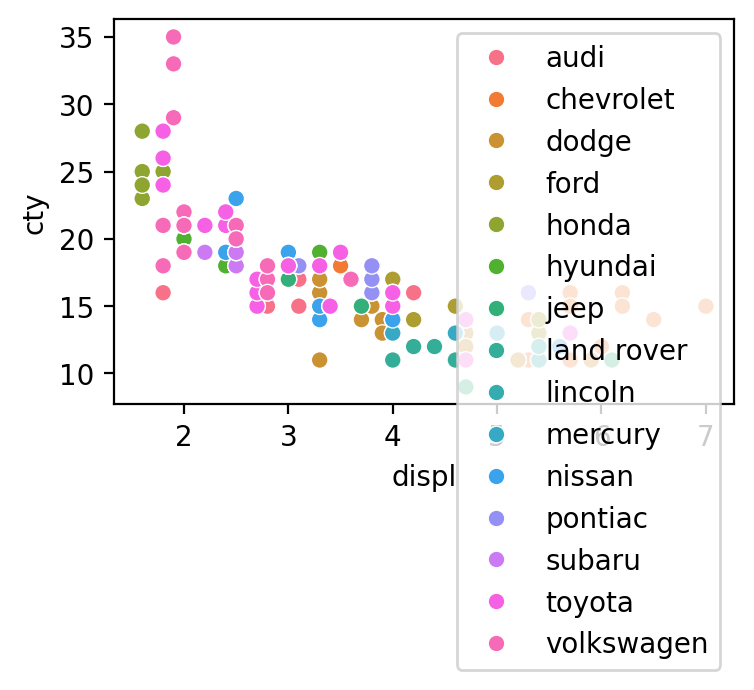

In [ ]:
sns.scatterplot(data = mpg, x = 'displ', y = 'cty', hue = 'manufacturer');
plt.legend(loc='best');

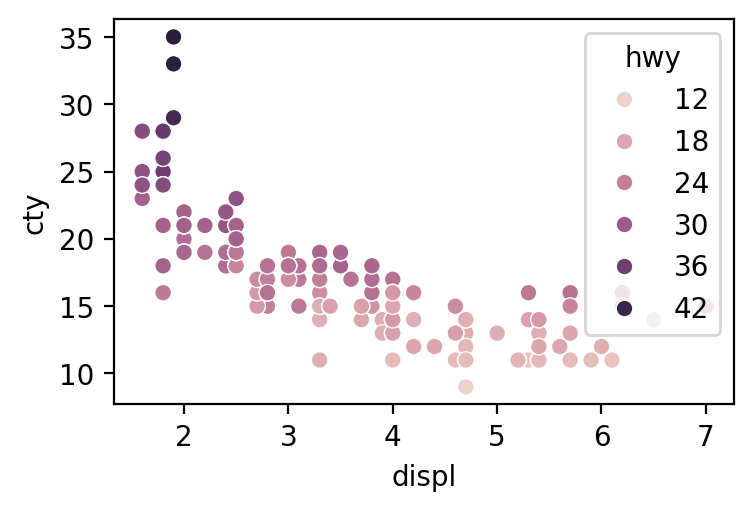

In [ ]:
sns.scatterplot(data = mpg, x = 'displ', y = 'cty', hue = 'hwy');

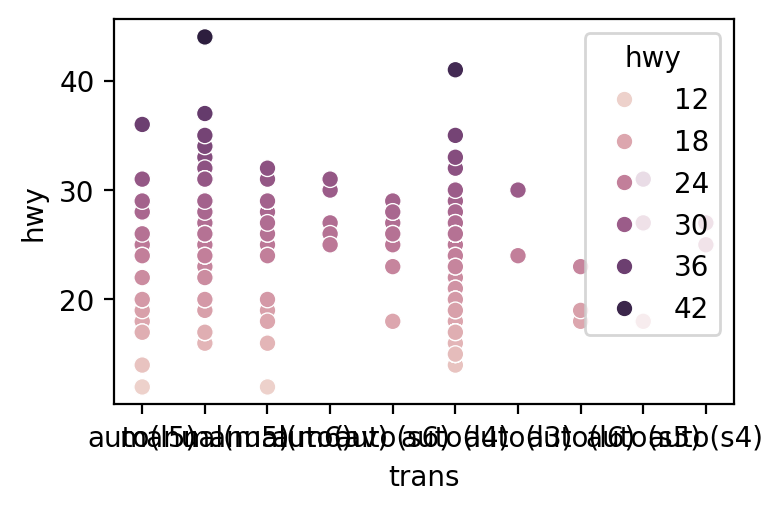

In [ ]:
sns.scatterplot(data = mpg, x = 'trans', y = 'hwy', hue = 'hwy');

### 집단별 평균표 만들기

In [ ]:
mpg.groupby('drv')['hwy'].mean().to_frame()

,hwy
drv,
4,19.17
f,28.16
r,21.00


In [ ]:
df_mpg = mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))
df_mpg

,mean_hwy
drv,
4,19.17
f,28.16
r,21.00


In [ ]:
df_mpg = mpg.groupby('drv', as_index = False).agg(mean_hwy = ('hwy', 'mean'))
df_mpg

,drv,mean_hwy
0,4,19.17
1,f,28.16
2,r,21.00


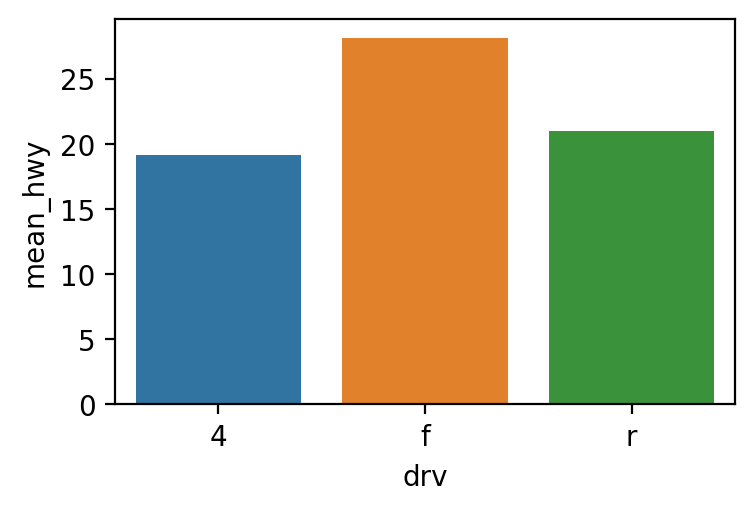

In [ ]:
# barplot

sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy', hue = 'drv');

<Axes: xlabel='drv', ylabel='mean_hwy'>

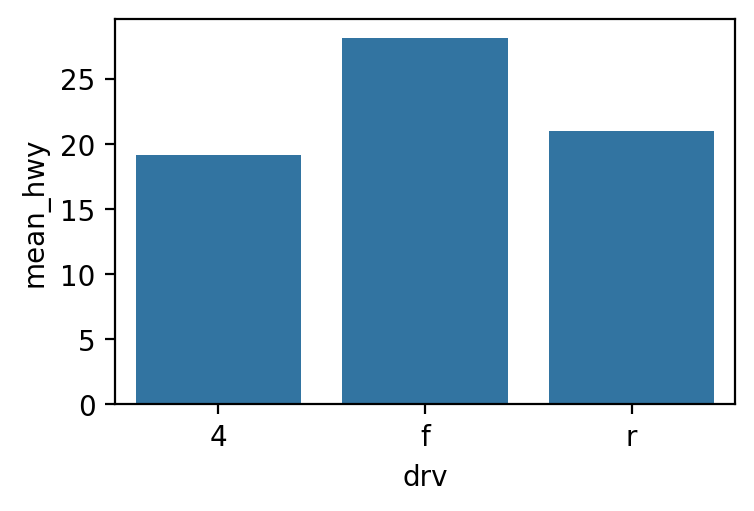

In [ ]:
sns.barplot(df_mpg, x = 'drv', y ='mean_hwy')       # 같은 색으로 출력

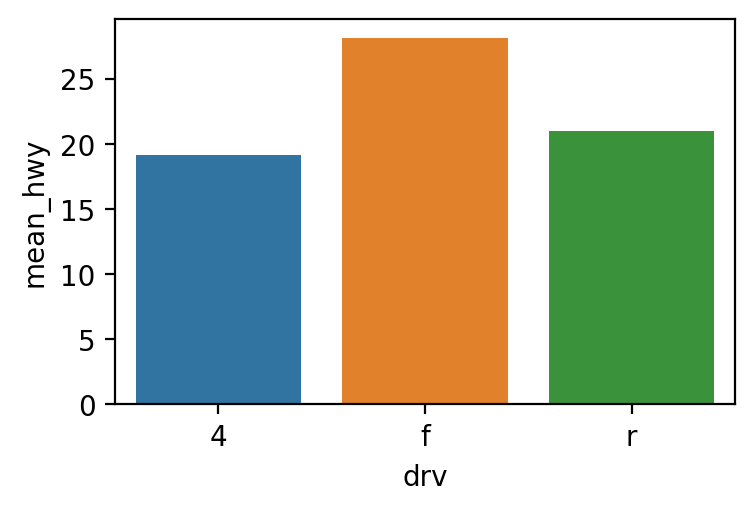

In [ ]:
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy', hue = 'drv', order = ['4','f','r']);

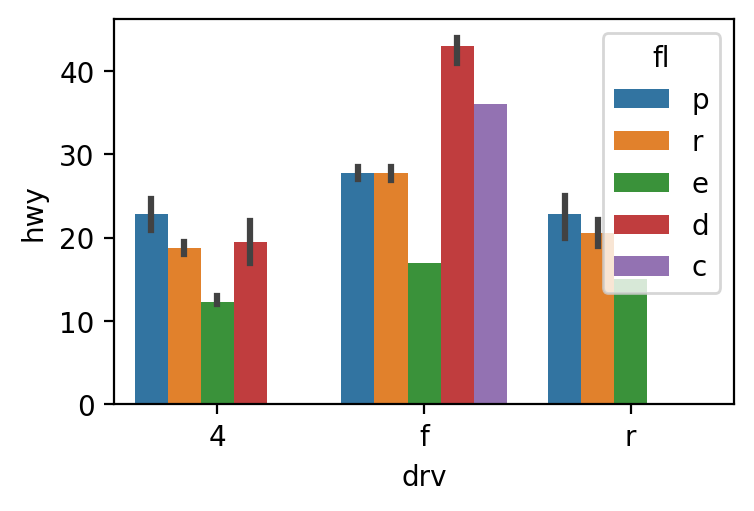

In [ ]:
sns.barplot(data = mpg, x = 'drv', y = 'hwy', hue = 'fl', order = ['4','f','r']);

In [ ]:
pd.set_option('display.precision', 2)

df_mpg = mpg.groupby('drv', as_index = False).agg(mean_hwy = ('hwy', 'mean'))

In [ ]:
df_mpg = df_mpg.sort_values('mean_hwy', ascending = False)
df_mpg

,drv,mean_hwy
1,f,28.16
2,r,21.00
0,4,19.17


<Axes: xlabel='drv', ylabel='mean_hwy'>

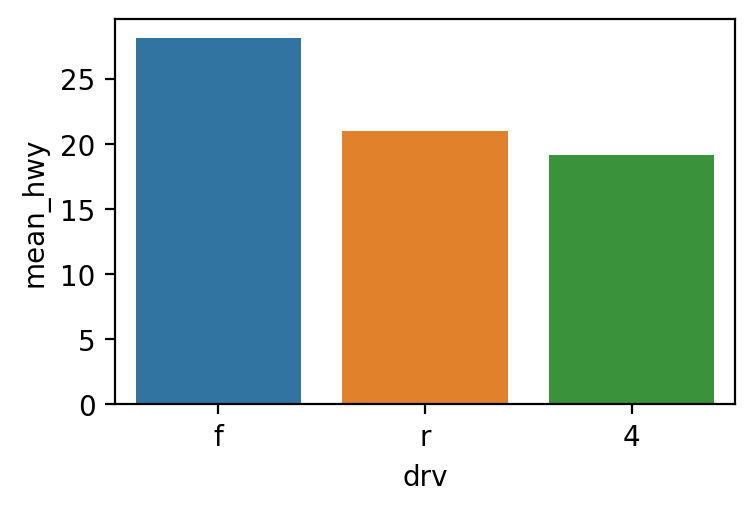

In [ ]:
sns.barplot(df_mpg, x = 'drv', y = 'mean_hwy', hue = 'drv')

In [ ]:
mpg.describe(include='all')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
count,234,234,234.00,234.00,234.00,234,234,234.00,234.00,234,234
unique,15,38,NaN,NaN,NaN,10,3,NaN,NaN,5,7
top,dodge,caravan 2wd,NaN,NaN,NaN,auto(l4),f,NaN,NaN,r,suv
freq,37,11,NaN,NaN,NaN,83,106,NaN,NaN,168,62
mean,NaN,NaN,3.47,2003.50,5.89,NaN,NaN,16.86,23.44,NaN,NaN
std,NaN,NaN,1.29,4.51,1.61,NaN,NaN,4.26,5.95,NaN,NaN
min,NaN,NaN,1.60,1999.00,4.00,NaN,NaN,9.00,12.00,NaN,NaN
25%,NaN,NaN,2.40,1999.00,4.00,NaN,NaN,14.00,18.00,NaN,NaN
50%,NaN,NaN,3.30,2003.50,6.00,NaN,NaN,17.00,24.00,NaN,NaN
75%,NaN,NaN,4.60,2008.00,8.00,NaN,NaN,19.00,27.00,NaN,NaN


In [ ]:
mpg.groupby('drv', as_index= False).count()

,drv,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,category
0,4,103,103,103,103,103,103,103,103,103,103
1,f,106,106,106,106,106,106,106,106,106,106
2,r,25,25,25,25,25,25,25,25,25,25


In [ ]:
# 집단별 빈도표 만들기
mpg.groupby('drv', as_index = False).count()[['drv', 'model']]

,drv,model
0,4,103
1,f,106
2,r,25


In [ ]:
# 행, 열 이름 바꾸기
mpg.groupby('drv', as_index = False).count()[['drv', 'model']].rename(columns = {'model': 'n'})

,drv,n
0,4,103
1,f,106
2,r,25


In [ ]:
# 더 간단하게
df_mpg = mpg.groupby('drv', as_index = False).agg(n = ('drv', 'count'))
df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


In [ ]:
df_mpg2 = mpg.groupby('drv').agg(n = ('drv', 'count'))
df_mpg2

,n
drv,
4,103
f,106
r,25


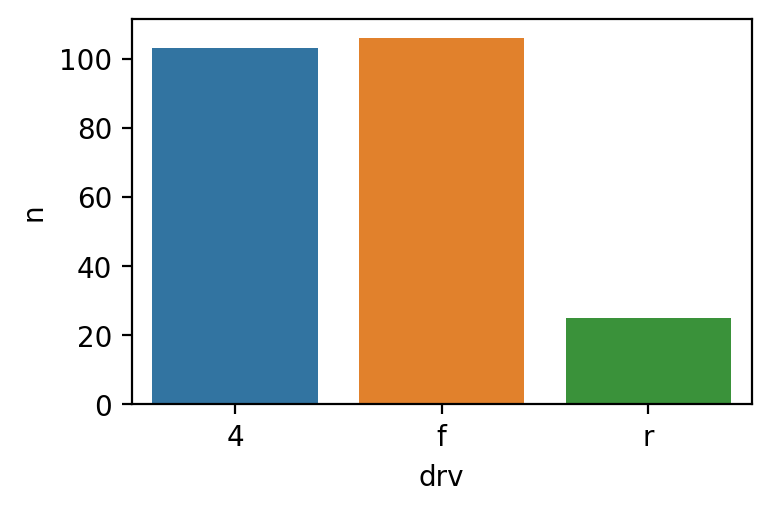

In [ ]:
sns.barplot(data = df_mpg, x = 'drv', y = 'n', hue = 'drv');

In [ ]:
mpg['drv'].unique()

array(['f', '4', 'r'], dtype=object)

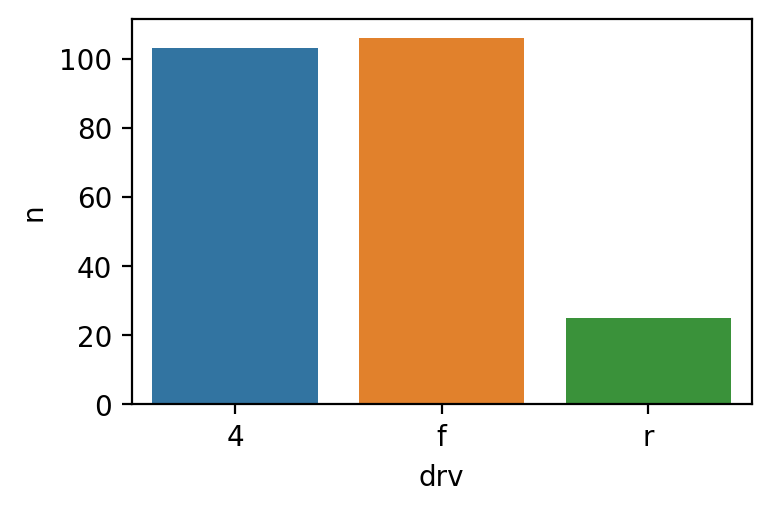

In [ ]:
sns.barplot(data = df_mpg, x = 'drv', y = 'n', hue = 'drv',order= ['4','f','r']);

In [ ]:
mpg['drv'].value_counts()

drv
f    106
4    103
r     25
Name: count, dtype: int64

In [ ]:
mpg['drv'].value_counts().index

Index(['f', '4', 'r'], dtype='object', name='drv')

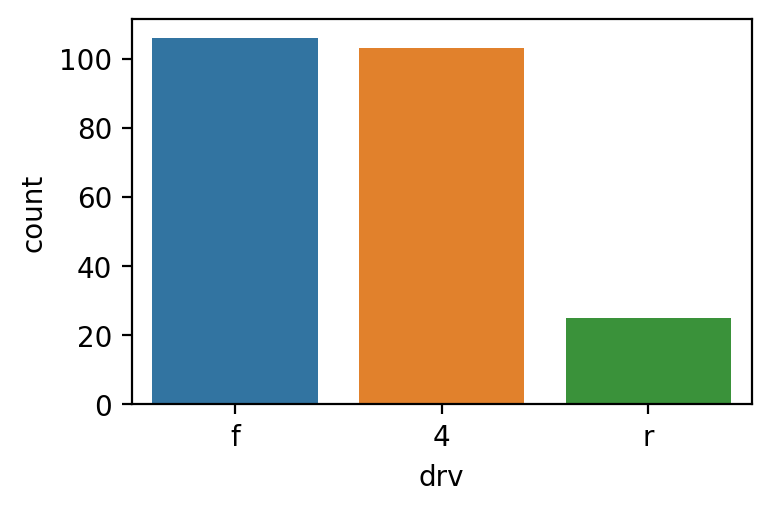

In [ ]:
# drv 빈도 높은 순으로 막대 정렬
sns.countplot(data = mpg, x = 'drv', hue = 'drv', order = mpg['drv'].value_counts().index);

### 시계열 그래프 만들기

In [ ]:
economics = pd.read_csv('data/economics.csv')
economics.head()

In [ ]:
economics.shape

(574, 6)

In [ ]:
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


<Axes: xlabel='date', ylabel='unemploy'>

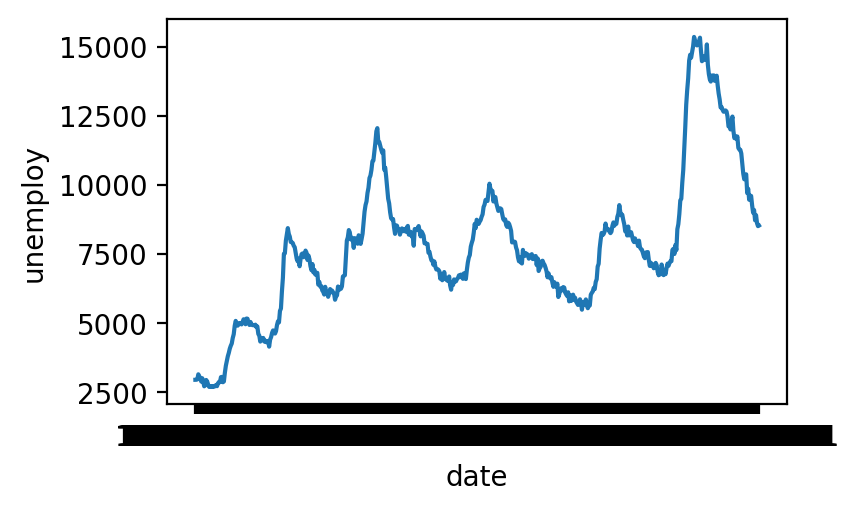

In [ ]:
sns.lineplot(economics , x = 'date', y = 'unemploy')

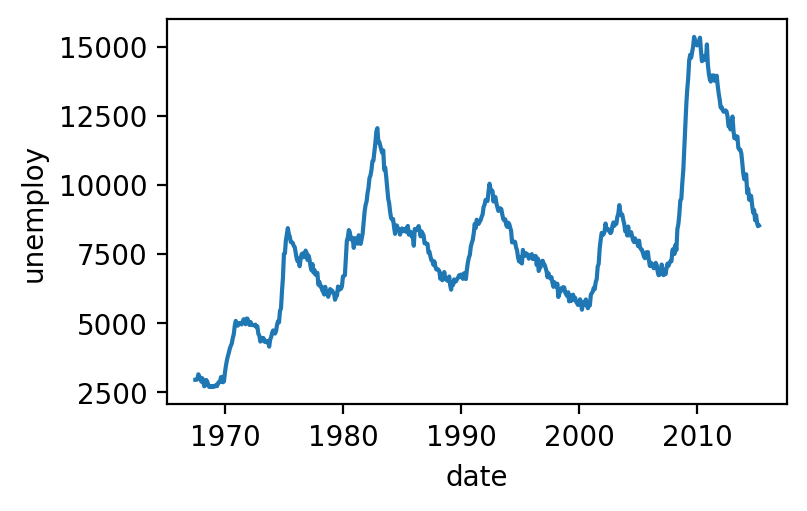

In [ ]:
sns.lineplot(data = economics, x = pd.to_datetime(economics['date']), y = 'unemploy');

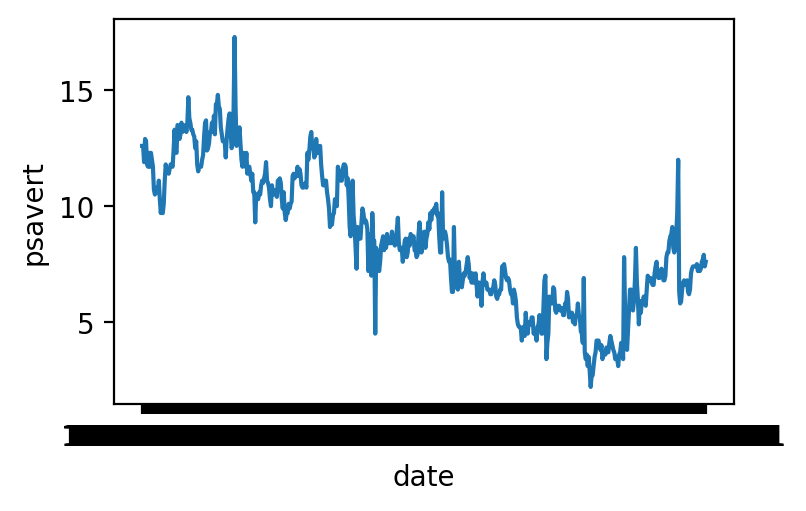

In [ ]:
sns.lineplot(data = economics, x = 'date', y = 'psavert');

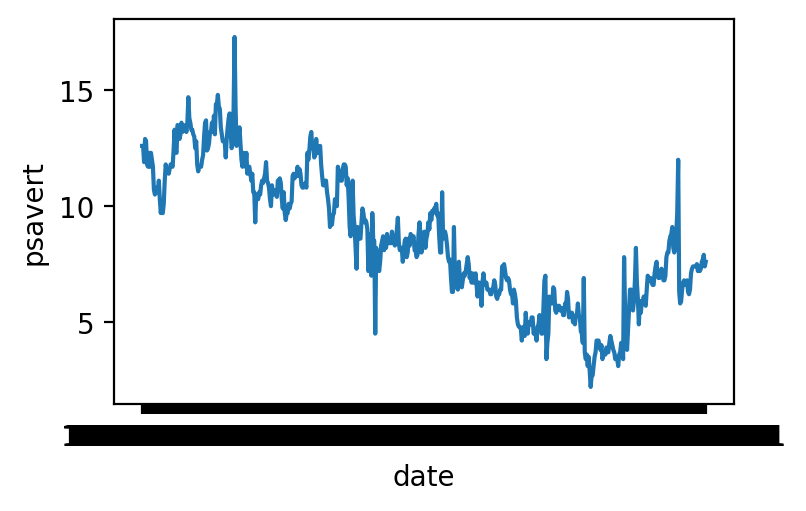

In [ ]:
sns.lineplot(data = economics, x = 'date', y = 'psavert');

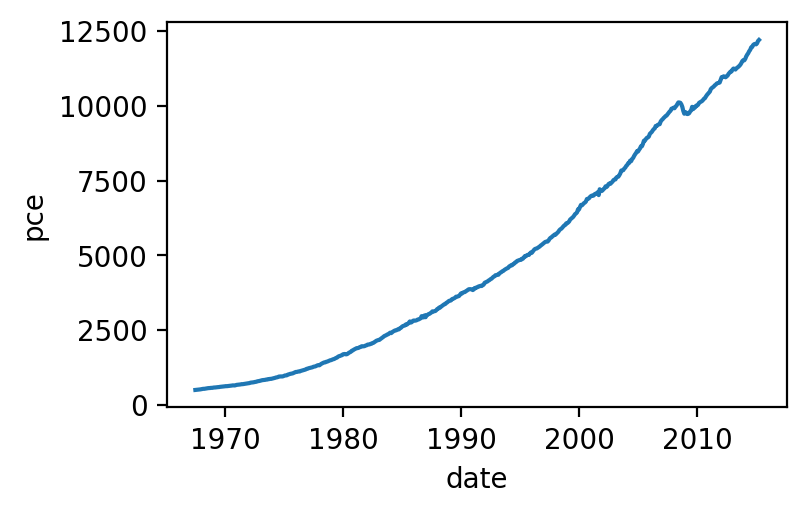

In [ ]:
sns.lineplot(data = economics, x = pd.to_datetime(economics.date), y = 'pce');

In [ ]:
# 날짜 시간 타입 변수 만들기
economics['date2'] = pd.to_datetime(economics['date'])


In [ ]:
economics[['date','date2']]

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01
...,...,...
569,2014-12-01,2014-12-01
570,2015-01-01,2015-01-01
571,2015-02-01,2015-02-01
572,2015-03-01,2015-03-01


In [ ]:
economics.date2.dt.year     # 년 추출

0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: date2, Length: 574, dtype: int32

In [ ]:
economics.date2.dt.month      # 월 추출

0       7
1       8
2       9
3      10
4      11
       ..
569    12
570     1
571     2
572     3
573     4
Name: date2, Length: 574, dtype: int32

In [ ]:
economics.date2.dt.day    # 일 추출

0      1
1      1
2      1
3      1
4      1
      ..
569    1
570    1
571    1
572    1
573    1
Name: date2, Length: 574, dtype: int32

In [ ]:
# 연도 변수 추가
economics['year'] = economics['date2'].dt.year
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


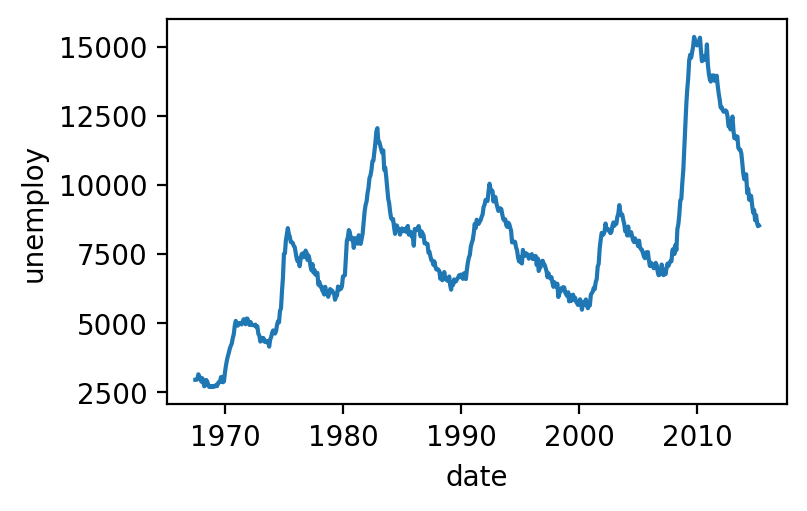

In [ ]:
sns.lineplot(data = economics, x = pd.to_datetime(economics['date']), y = 'unemploy');

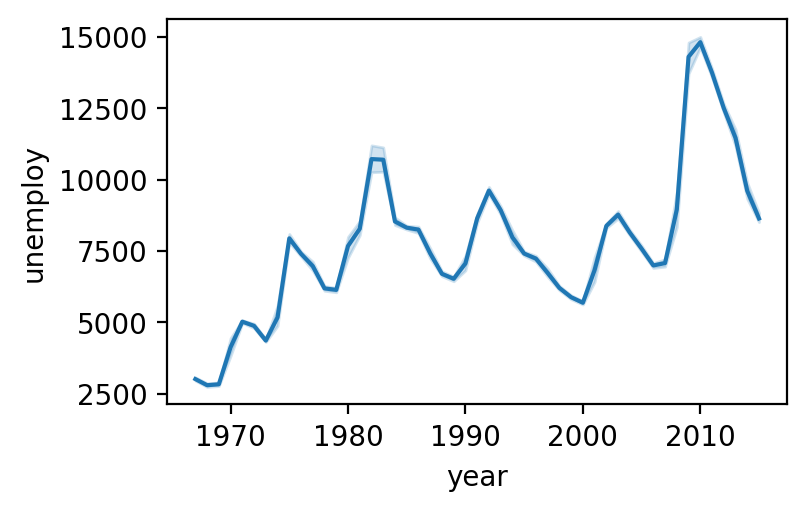

In [ ]:
# x축에 연도 표시
sns.lineplot(data = economics, x = 'year', y = 'unemploy');

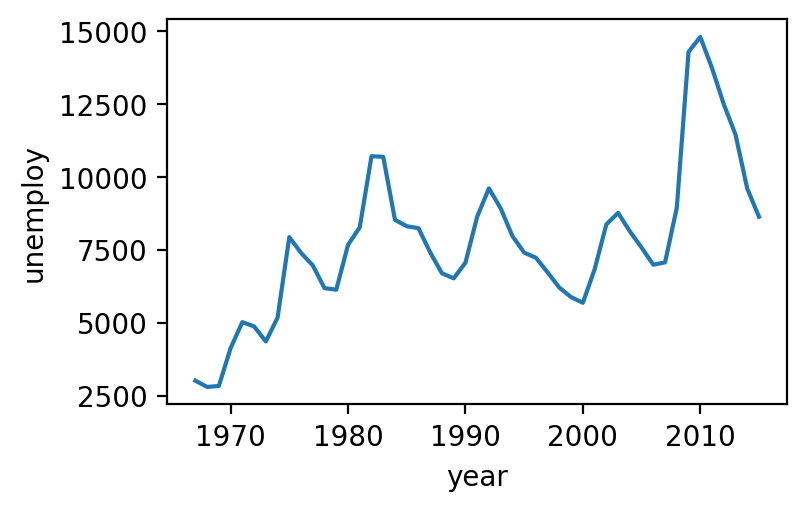

In [ ]:
sns.lineplot(data = economics, x = 'year', y = 'unemploy',errorbar = None);

### 상자 그림 만들기



<Axes: xlabel='drv', ylabel='hwy'>

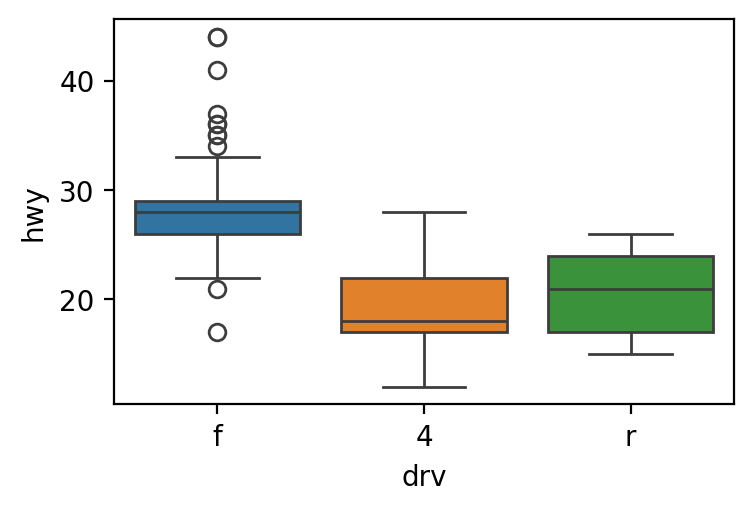

In [ ]:
sns.boxplot(mpg, x = 'drv' , y = 'hwy' , hue = 'drv')

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize' : [6, 3]})

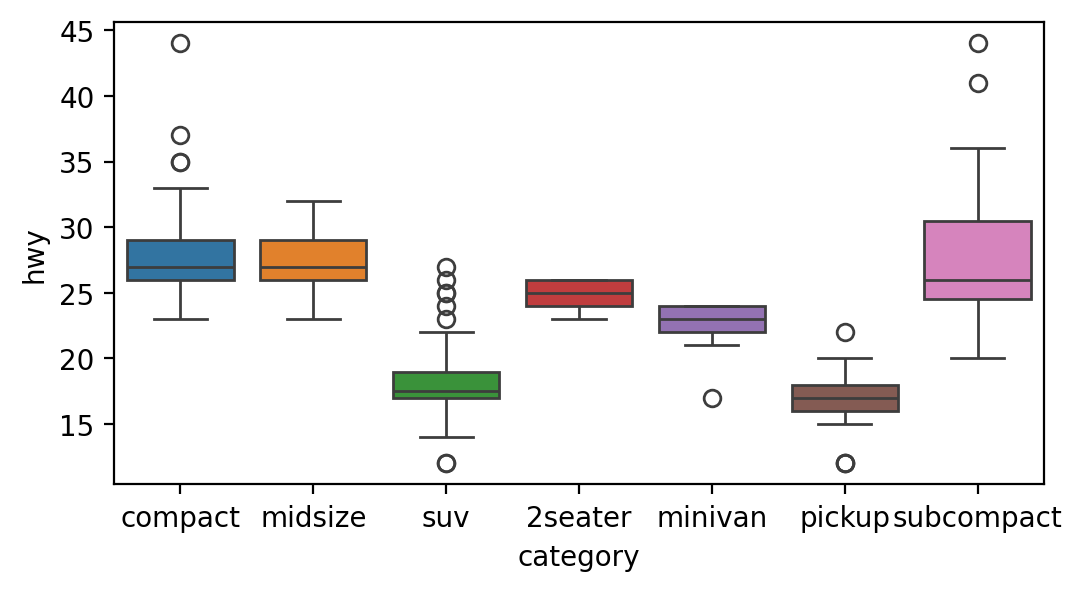

In [ ]:
sns.boxplot(data = mpg, x = 'category', y = 'hwy',  hue = 'category');

<Axes: xlabel='category', ylabel='hwy'>

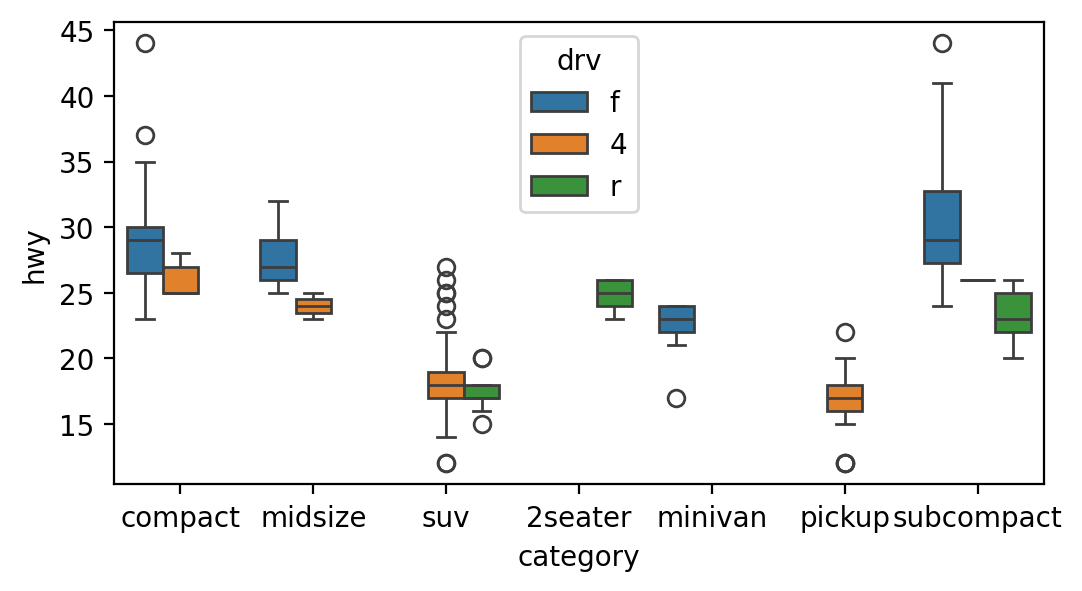

In [ ]:
sns.boxplot(mpg, x = 'category', y = 'hwy', hue = 'drv')

In [ ]:
mpg.query('fl=="e"')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
29,chevrolet,k1500 tahoe 4wd,5.3,2008,8,auto(l4),4,11,14,e,suv
43,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,11,17,e,minivan
54,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
69,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup
126,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv


In [ ]:
mpg[mpg.fl=="e"]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
29,chevrolet,k1500 tahoe 4wd,5.3,2008,8,auto(l4),4,11,14,e,suv
43,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,11,17,e,minivan
54,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
69,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup
126,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv


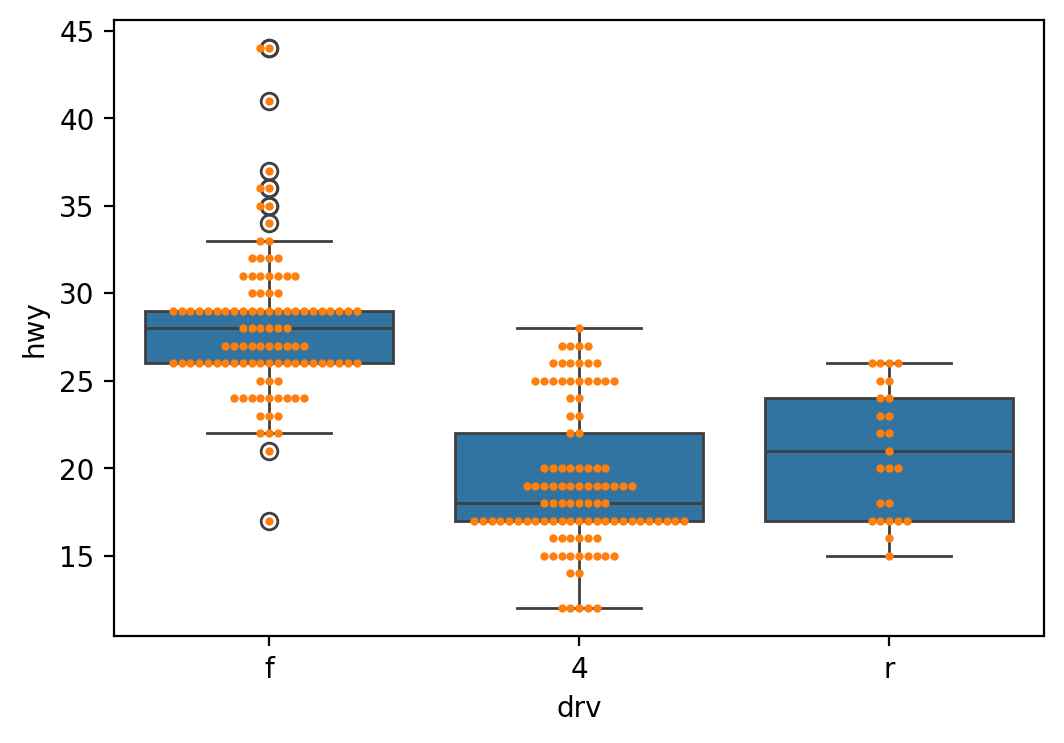

In [ ]:
# plt.rcParams.update({'figure.figsize' : [5, 3]})        # 그림 크기, 기본값 [6, 4]
plt.rcParams.update({'figure.figsize': [6, 4]})
sns.boxplot(data = mpg, x = 'drv', y = 'hwy');
sns.swarmplot(data = mpg, x = 'drv', y = 'hwy', size=3);

In [ ]:
mpg[mpg.hwy > 34].sort_values(by=["hwy"], ascending=[False])    # 시험 예상

### 시험

### 가로로 합치기 merge(): 행의 선택은?

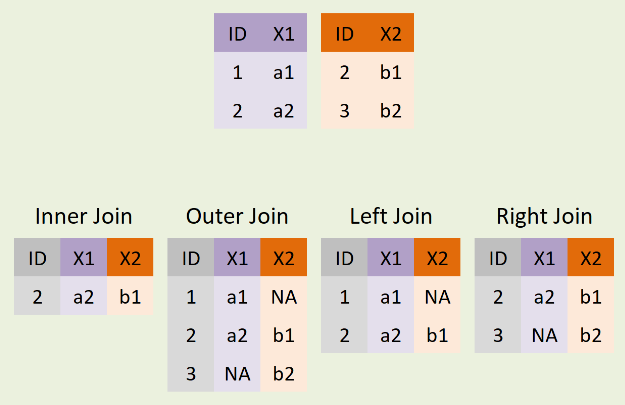

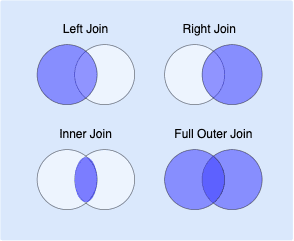

In [ ]:
import pandas as pd

# 중간고사 데이터 만들기
test1 = pd.DataFrame({'id'      : [1, 2, 3, 4, 5],
                      'midterm' : [60, 80, 70, 90, 85]})

# 기말고사 데이터 만들기
test2 = pd.DataFrame({'id'    : [1, 2, 3, 6, 7],
                      'final' : [70, 83, 65, 95, 80]})

In [ ]:
test1

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [ ]:
test2

,id,final
0,1,70
1,2,83
2,3,65
3,6,95
4,7,80


In [ ]:
test1.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>id</th>\n      <th>midterm</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>1</td>\n      <td>60</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>2</td>\n      <td>80</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>3</td>\n      <td>70</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>4</td>\n      <td>90</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>5</td>\n      <td>85</td>\n    </tr>\n  </tbody>\n</table>'

In [ ]:
# 눈
from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html() + '&nbsp;'*4
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)



In [ ]:
display_side_by_side(test1,test2)

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
,id,final
0,1,70
1,2,83
2,3,65
3,6,95


In [ ]:
display_side_by_side(test1 , test2 , test1.merge(test2))

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
,id,final
0,1,70
1,2,83
2,3,65
3,6,95


In [ ]:
test1.merge(test2, how='inner')

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65


In [ ]:
test1.merge(test2, how='inner').iloc[1,2]       # 시험예상

83

In [ ]:
test1.merge(test2, how='inner').shape

(3, 3)

In [ ]:
test1.merge(test2, how='inner')

AttributeError: 'DataFrame' object has no attribute 'len'

In [ ]:
display_side_by_side(test1 , test2 , test1.merge(test2,how='left'))       # 왼쪽값

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
,id,final
0,1,70
1,2,83
2,3,65
3,6,95


In [ ]:
display_side_by_side(test1, test2, test1.merge(test2, how='right'))         # 오른쪽 값

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
,id,final
0,1,70
1,2,83
2,3,65
3,6,95


In [ ]:
display_side_by_side(test1, test2, test1.merge(test2, how='outer'))       # 전체

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
,id,final
0,1,70
1,2,83
2,3,65
3,6,95


In [ ]:
display_side_by_side(test1, test2, test1.merge(test2, how='cross'))     # cross 결과

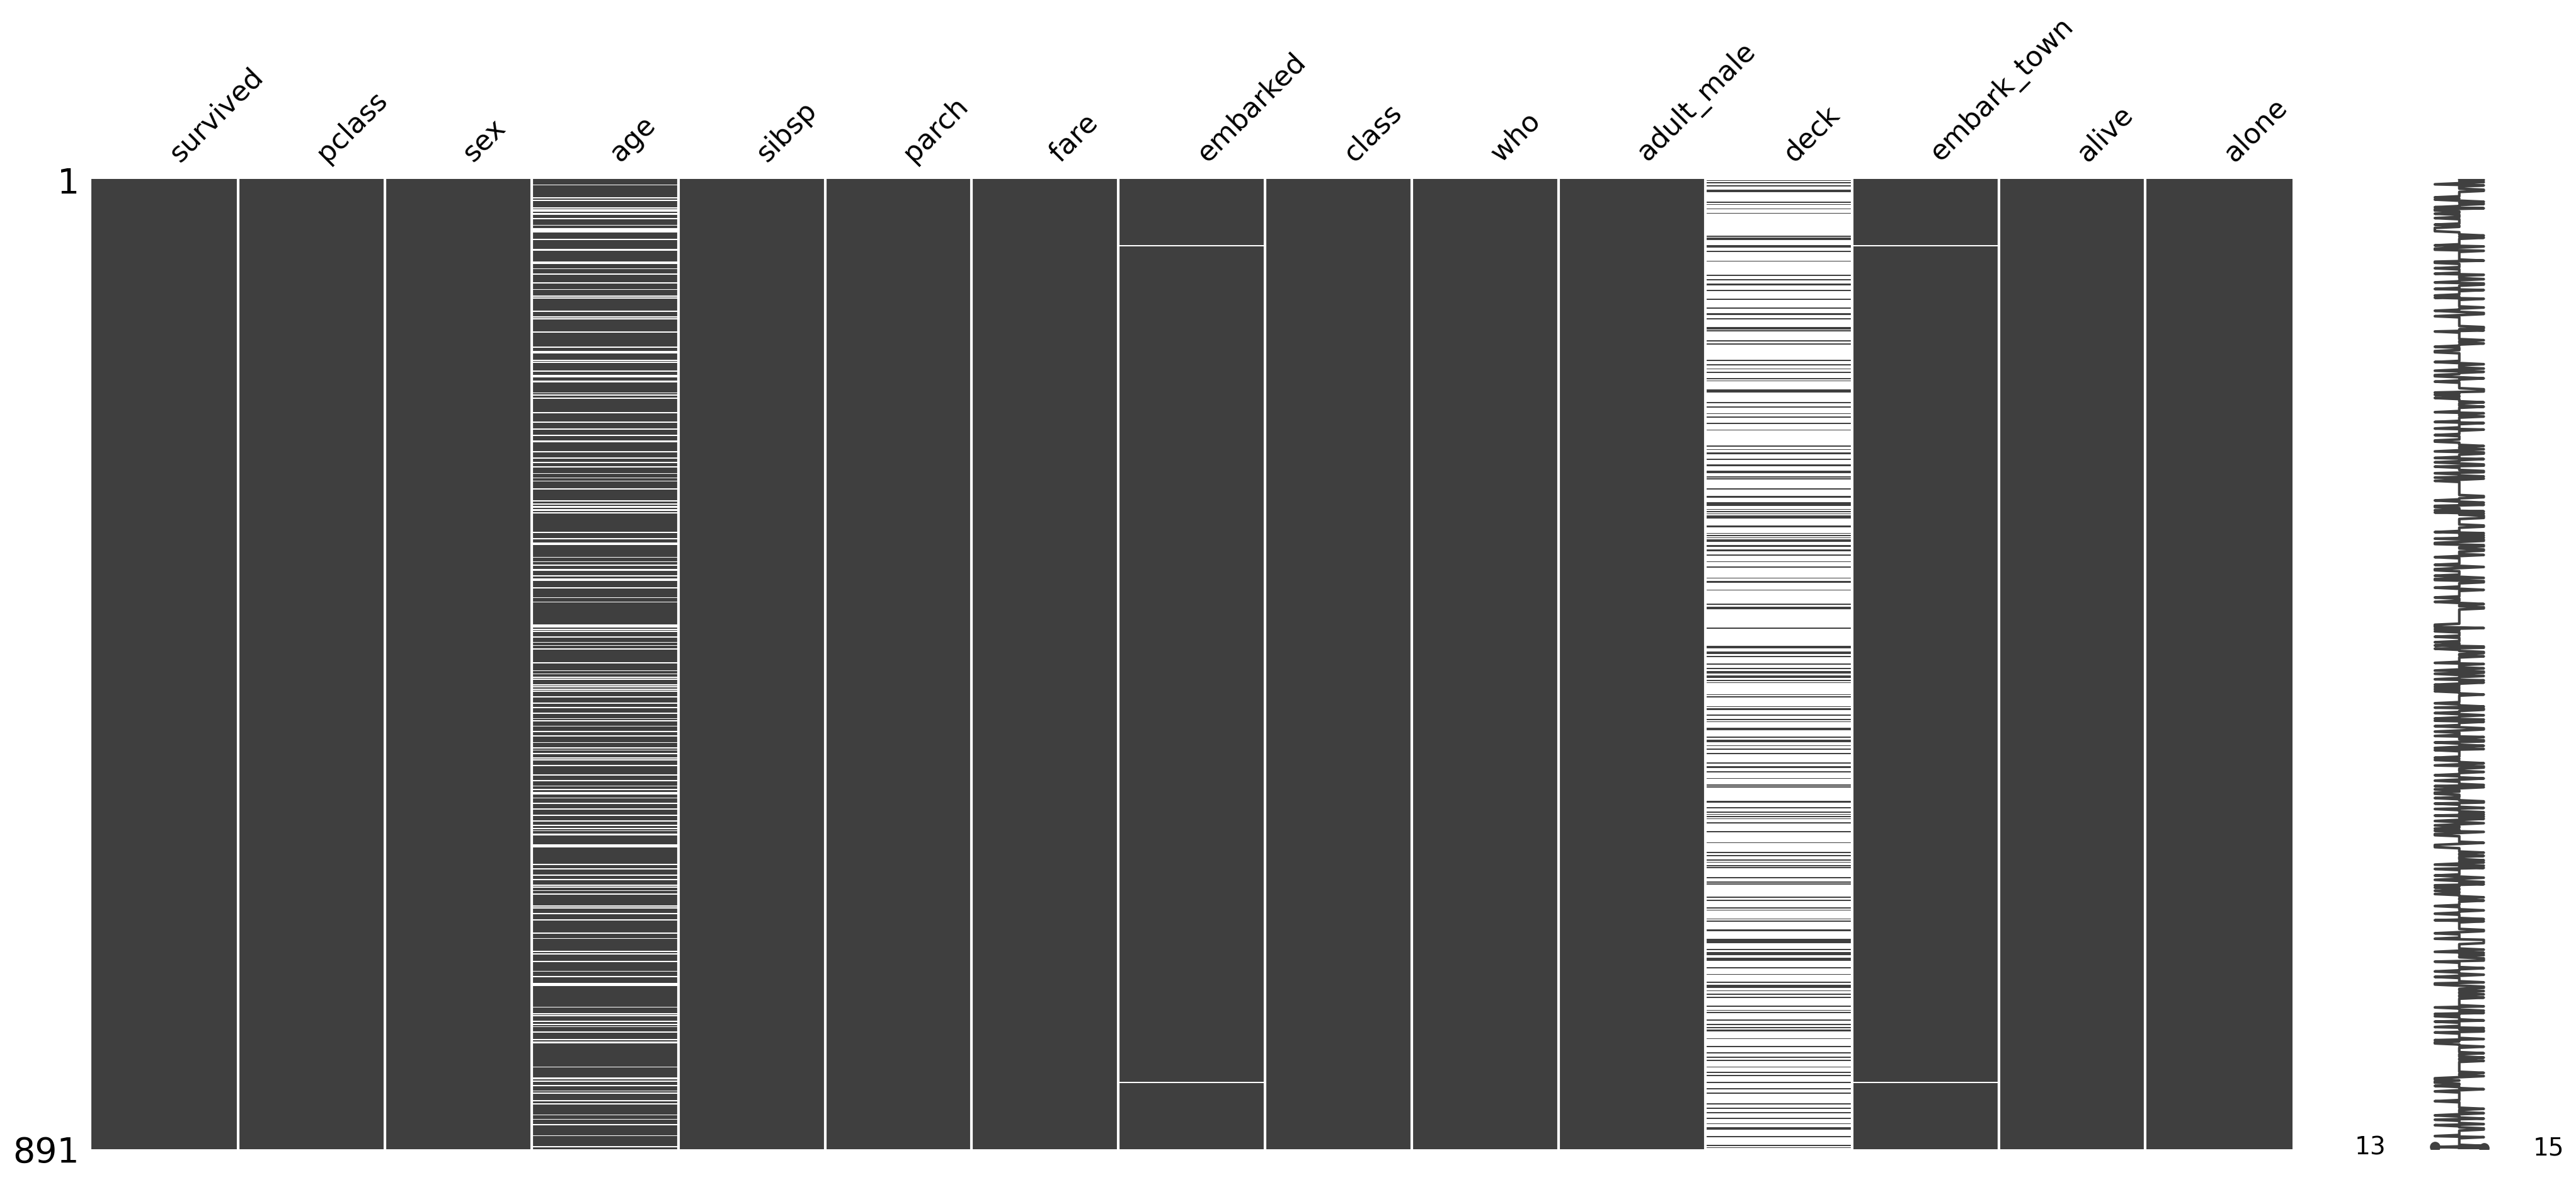

In [ ]:
import missingno as msno
import seaborn as sns
tdf = sns.load_dataset('titanic')

msno.matrix(tdf);

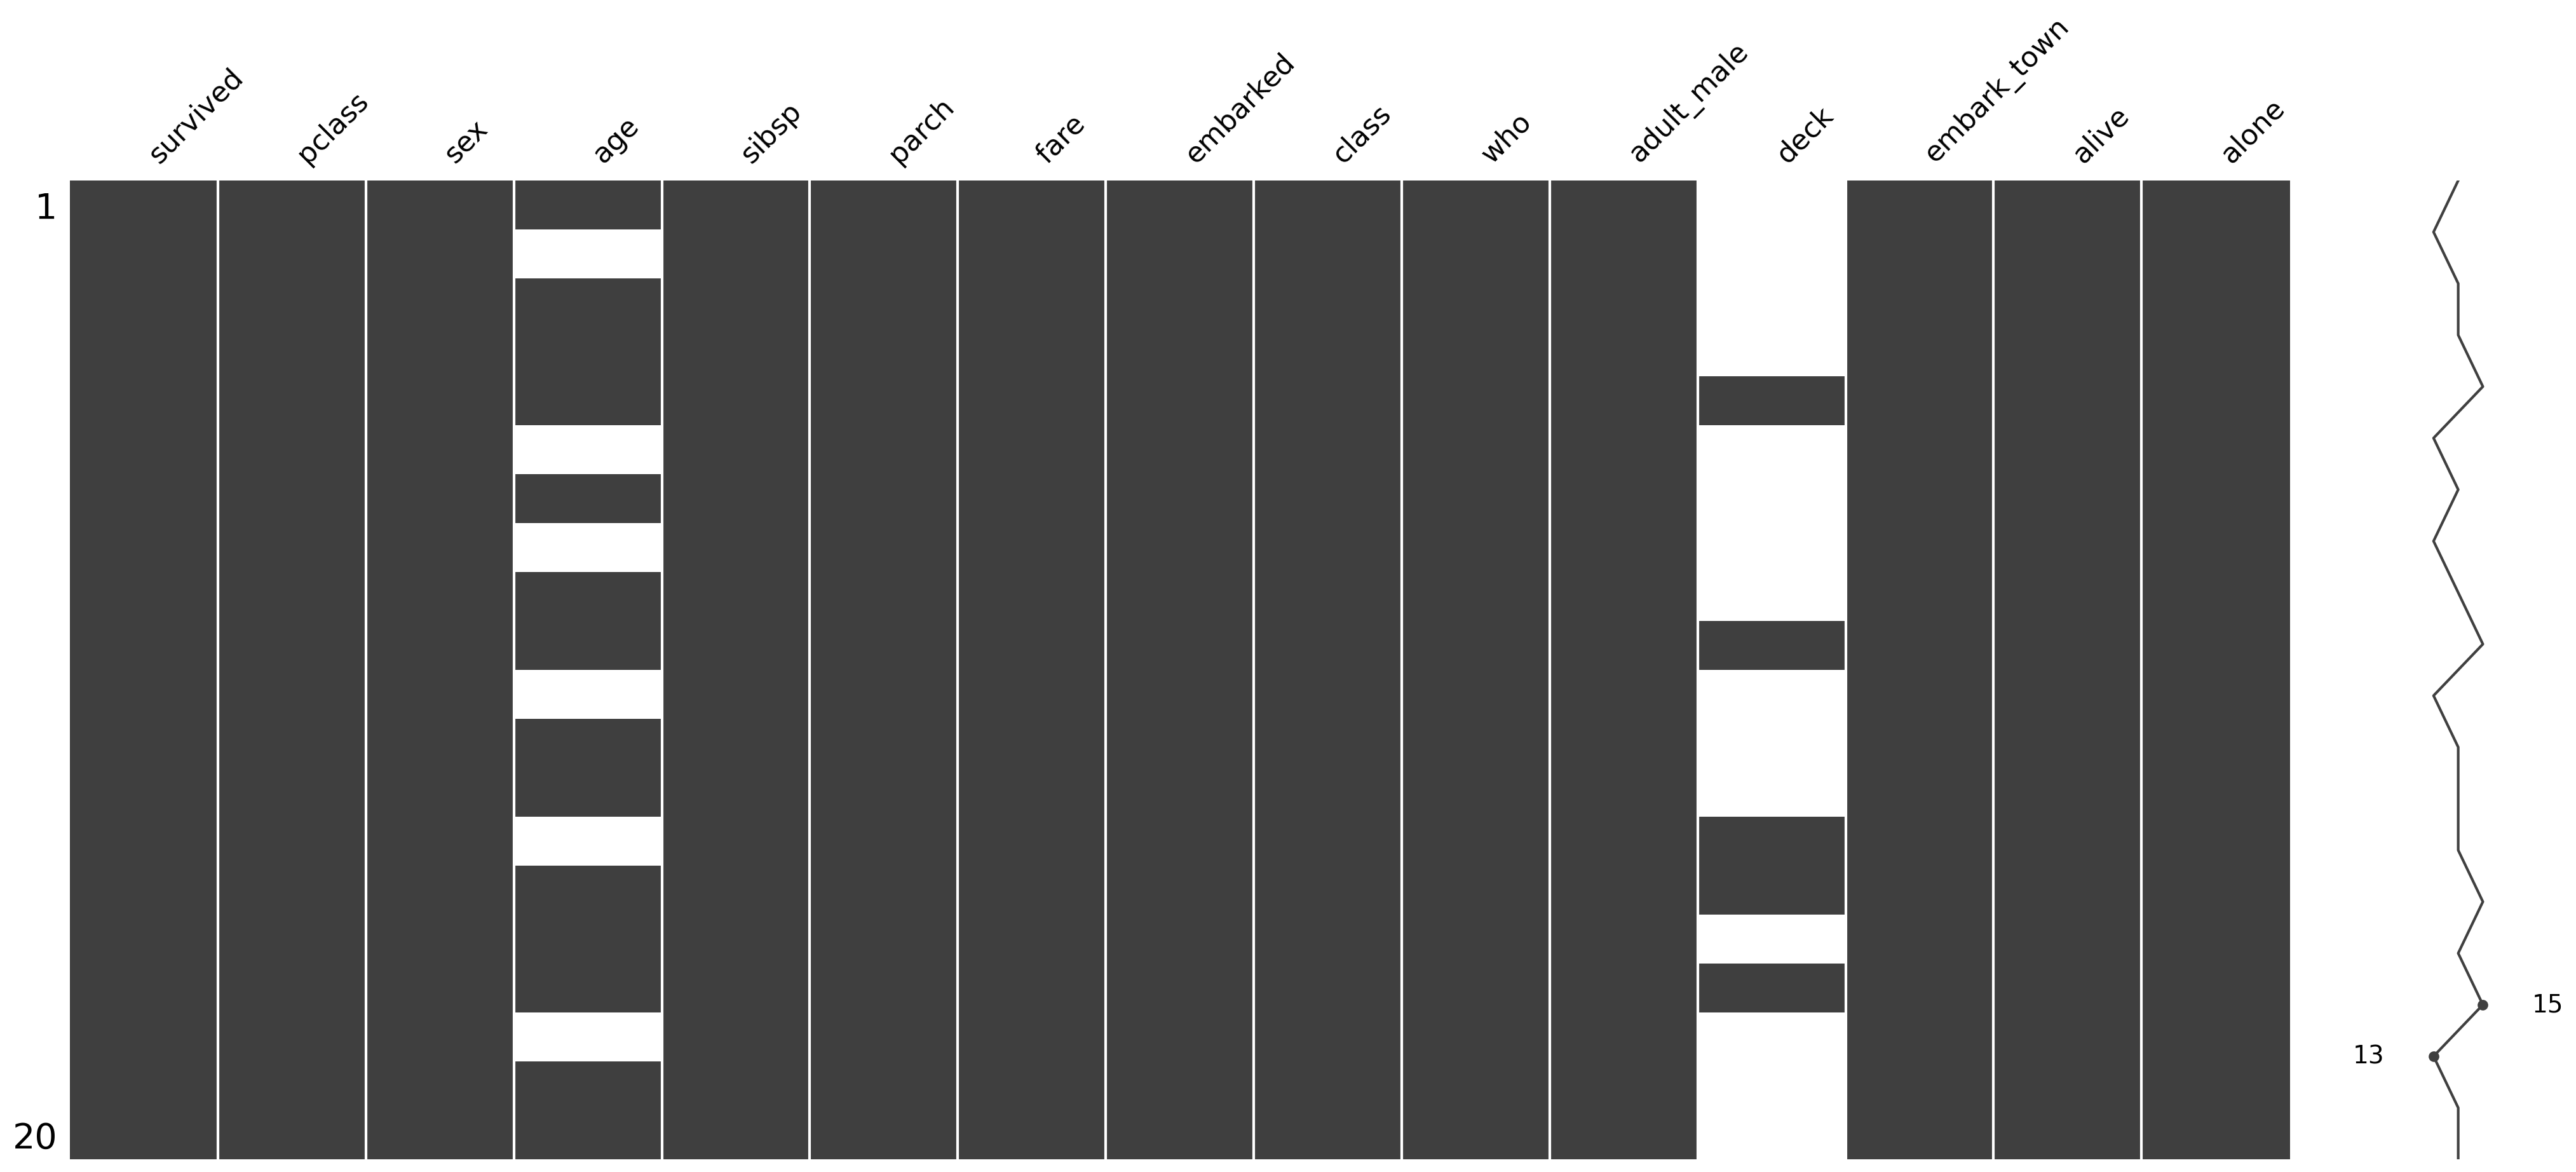

In [ ]:
msno.matrix(tdf.sample(20));

1. o ,x 3문제
2. 빈칸 3문제
3. 내부 객관식 3문제
4. 소스 빈 부분을 완성하시오 ( 코드 주고 빈 부분 ex) rename
5. 코드 작성 (np.numpy where 이용하여 코드 구연 열(?)
6. mpg  4문제 쓰는게 많음
7.merge ( 4문제 )
8. null 처리 결측치처리 isna, 등등 코드의 결과 쓰시오